In [3]:
import pandas as pd
import numpy as np

In [14]:
#Decision Tree libraries
from sklearn.tree import DecisionTreeRegressor

In [6]:
# loading

ins_df = pd.read_csv("/content/insurance.csv")

In [7]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
ins_df.shape

(1338, 7)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
les = {}
for col in ['sex','smoker','region']:
    les[col] = LabelEncoder()
    ins_df[col]  = les[col].fit_transform(ins_df[col])

In [13]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [30]:
# if there is unreaevant column that does not bring any value we can delete it. with this:

# 

# how would we know that certain column does not bring any value. 
# for example  we can look at the distribution of sex column first
'''
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()
'''
# then cheking the charges distributions for males and females
'''
x1 = sns.FacetGrid(df, row='sex', height=4, aspect=3)
x1 = x1.map(sns.distplot, 'charges', color='cornflowerblue')
plt.show()
'''

# As we can see the two distributions are almost the same for both women/men, 
#     so we can affirm that there is no influence on the medical charges 
#   when it comes to the sex variable


#delete a column

ins_df = ins_df.drop(columns=['sex','region'])
ins_df.head()


,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


## Test-train split

In [43]:
from sklearn.model_selection import train_test_split

X = ins_df.iloc[:,:-1].values
# or
"""
X = ins_df.loc[:, ins_df.columns != "charges"]
"""

y = ins_df.iloc[:,-1].values

X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=.3, random_state=42)

## Normally we should scale the features, but for decision trees and ensemble metod are not sensiteive to the variance in the data. So, no need for scaling.


In [57]:
dt  = DecisionTreeRegressor(max_depth = 5, """criterion='entropy'""")

#  dt  = DecisionTreeRegressor(max_depth = 5, criterion='entropy')
# seems like entropy is not working for regression

# I can add other regressors/algorithms here too
"""
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=10)
dt  = DecisionTreeRegressor(max_depth = 3)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)
"""

regressors = [('Decision Tree', dt)]

# I can add another regressors in a list for iteration in the next cell

""" regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]
"""

SyntaxError: ignored

If I need to use more regression algorithms I can use same iteration below for the future 

In [55]:
# it is for comparison of different regressors's performance/accuracy.

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

for regressor_name, regressor in regressors:

    regressor.fit(X_tr, y_tr)    
  
    y_pred = regressor.predict(X_tst)
    accuracy = round(r2_score(y_tst,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

KeyError: ignored

In [47]:
# visualize the Decision Trees
!pip install StringIO

from sklearn.tree import export_graphviz
from StringIO import StringIO

def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO


ModuleNotFoundError: ignored

In [45]:
plot_decision_tree(dt, X_tr,  ins_df.columns[1])

NameError: ignored

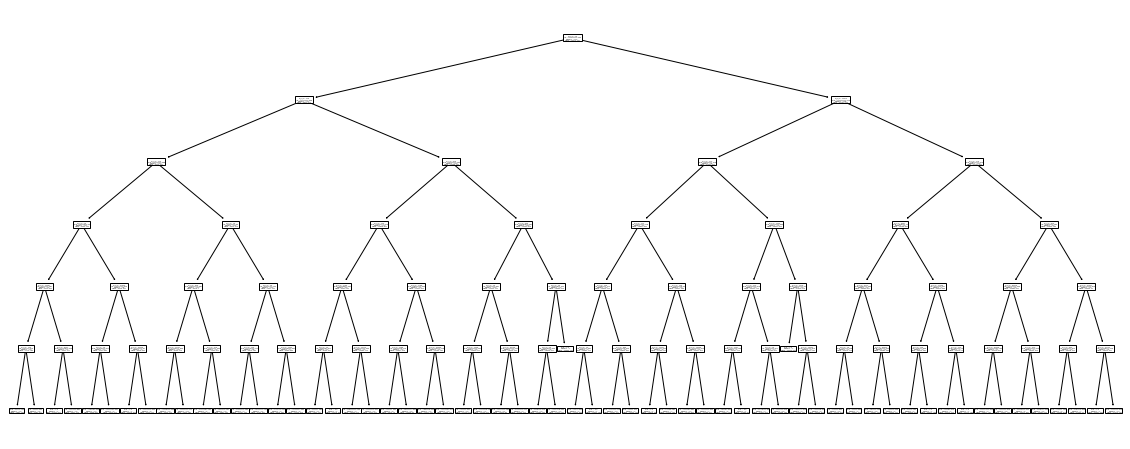

In [49]:
from sklearn import tree
tree.plot_tree(dt);